In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
os.chdir(r'C:\SML_Projects\SML_hotelBooking_cancelling_prediction')

In [3]:
df = pd.read_csv('data/merged/merged_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  float64
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_week_nights            119390 non-null  float64
 7   adults                          119390 non-null  float64
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  float64
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

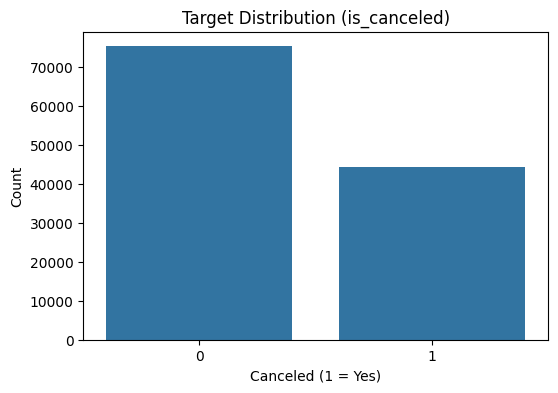

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=df)
plt.title("Target Distribution (is_canceled)")
plt.xlabel("Canceled (1 = Yes)")
plt.ylabel("Count")
plt.show()

In [6]:
df['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64

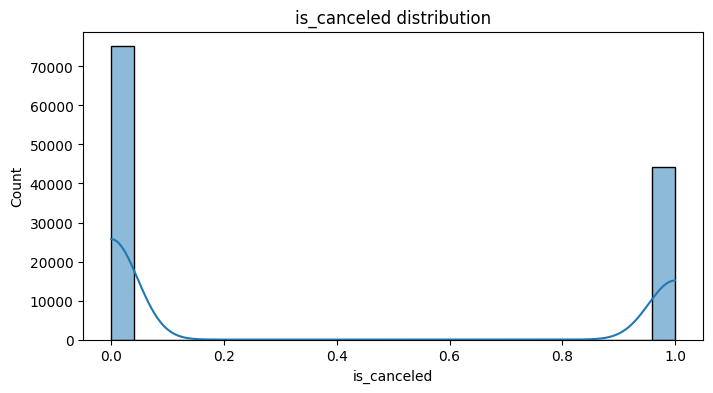

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df["is_canceled"], kde=True)
plt.title("is_canceled distribution")
plt.show()
plt.savefig('visuals/is_canceled_Distribution.png')

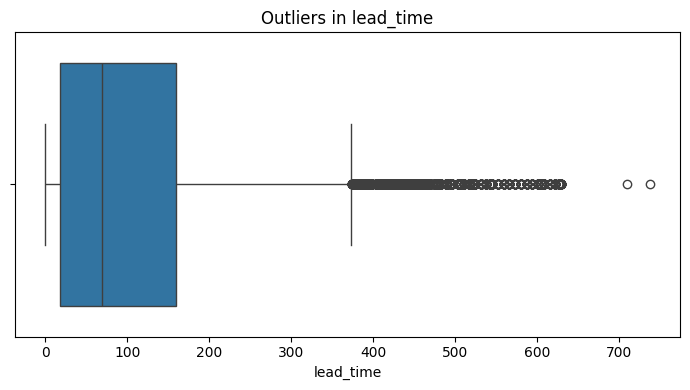

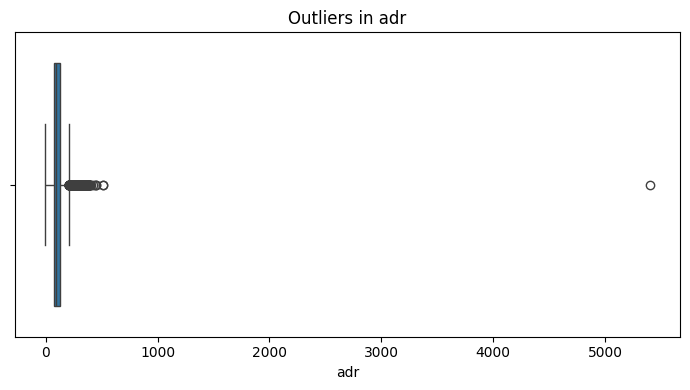

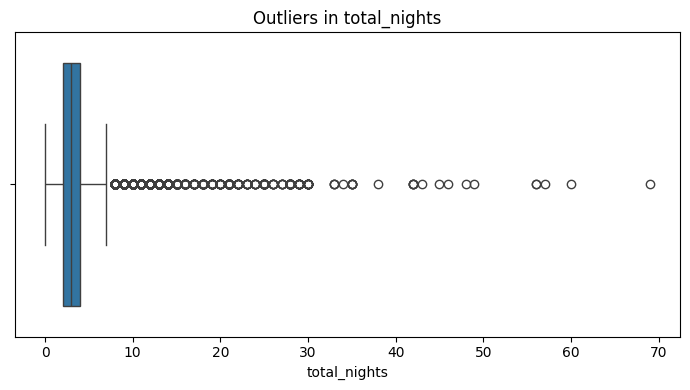

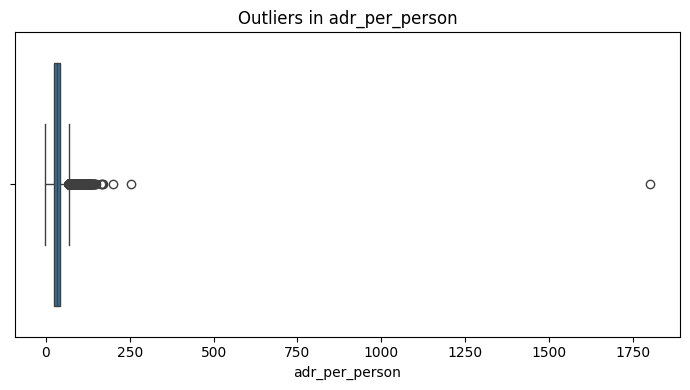

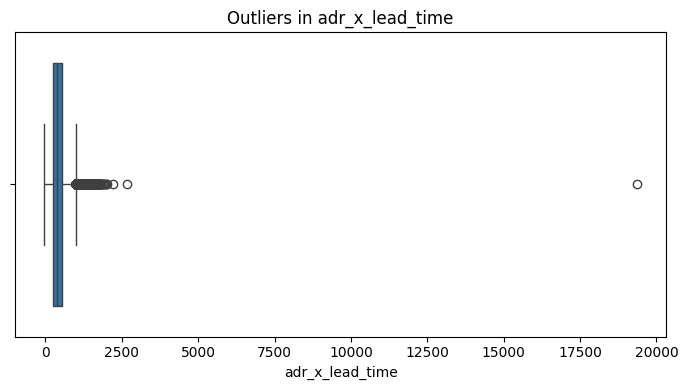

In [8]:
outlier_cols = [
    'lead_time', 'adr', 'total_nights',
    'adr_per_person', 'adr_x_lead_time'
]

for col in outlier_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.tight_layout()
    plt.savefig(f"visuals/outliers_{col}.png")
    plt.show()

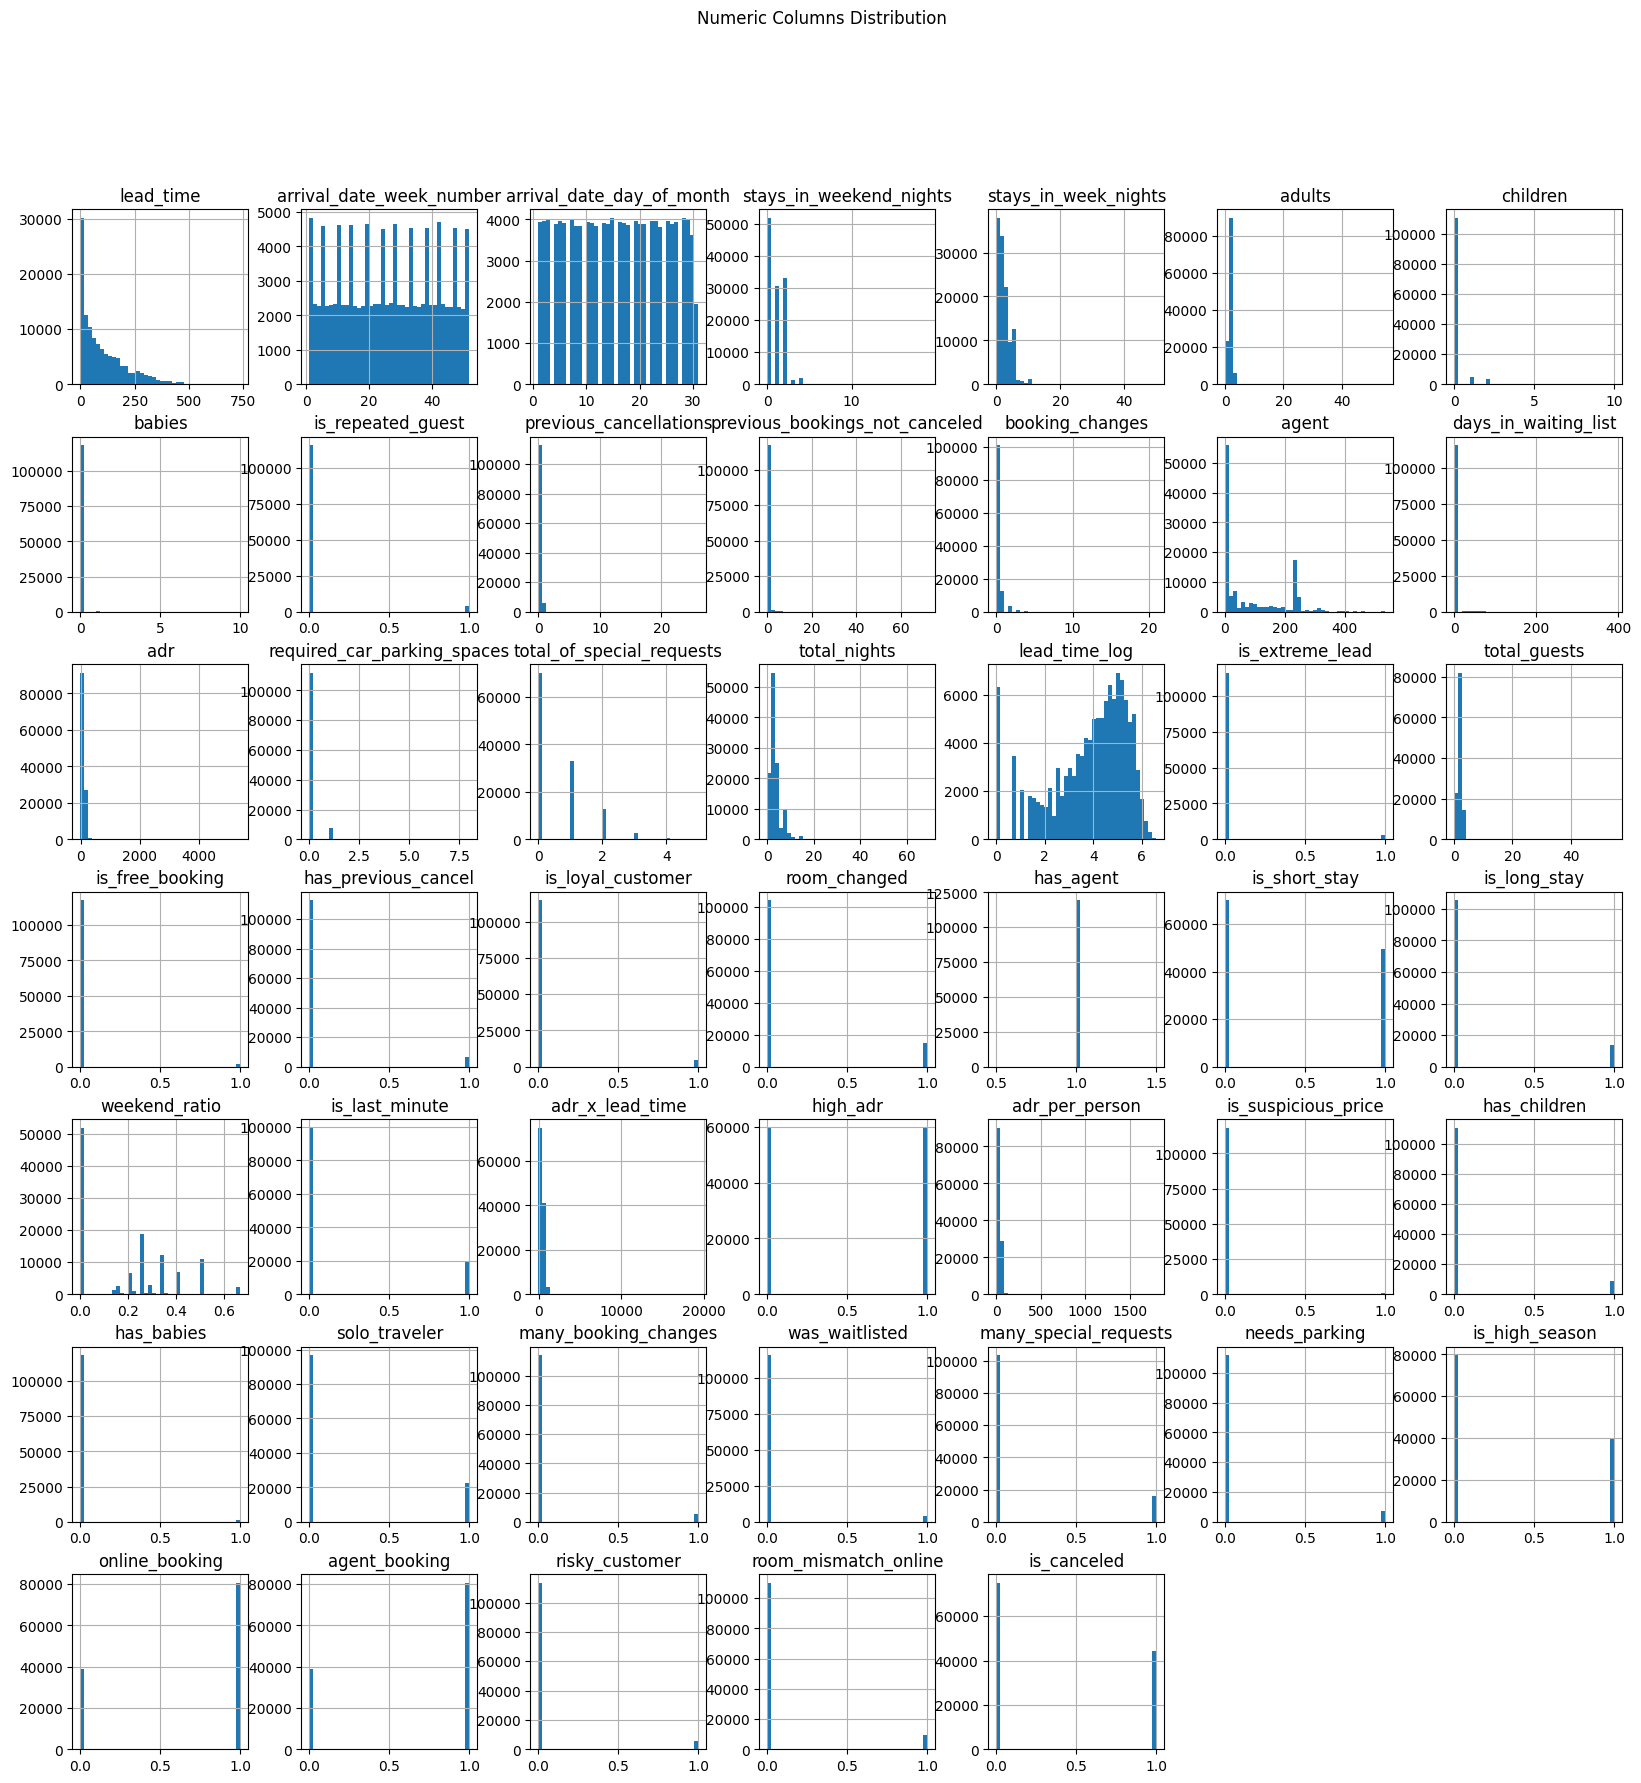

<Figure size 640x480 with 0 Axes>

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(20,20), bins=40)
plt.suptitle("Numeric Columns Distribution")
plt.show()
plt.savefig('visuals/Numeric_Columns_Distribution.png')

In [10]:
print("\n=== TOP CORRELATIONS WITH TARGET ===")
print(df[numeric_cols].corr()["is_canceled"].sort_values(ascending=False))


=== TOP CORRELATIONS WITH TARGET ===
is_canceled                       1.000000
lead_time_log                     0.320063
risky_customer                    0.293571
lead_time                         0.293123
has_previous_cancel               0.270943
adr_x_lead_time                   0.220351
previous_cancellations            0.110133
is_extreme_lead                   0.104346
was_waitlisted                    0.099032
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
total_guests                      0.046540
high_adr                          0.038751
adr_per_person                    0.034540
stays_in_week_nights              0.024765
total_nights                      0.017779
children                          0.005069
arrival_date_week_number          0.000500
stays_in_weekend_nights          -0.001791
is_high_season                   -0.002776
has_children                     -0.003666
arrival_date_day

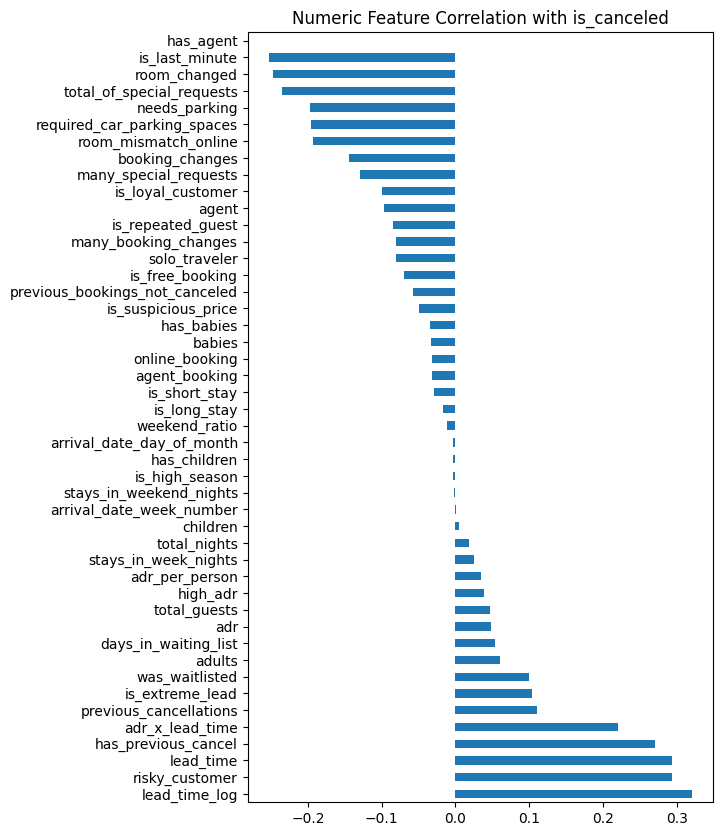

In [11]:
corr = df.select_dtypes(include=np.number).corr()['is_canceled'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
corr.drop('is_canceled').plot(kind='barh')
plt.title("Numeric Feature Correlation with is_canceled")
plt.show()

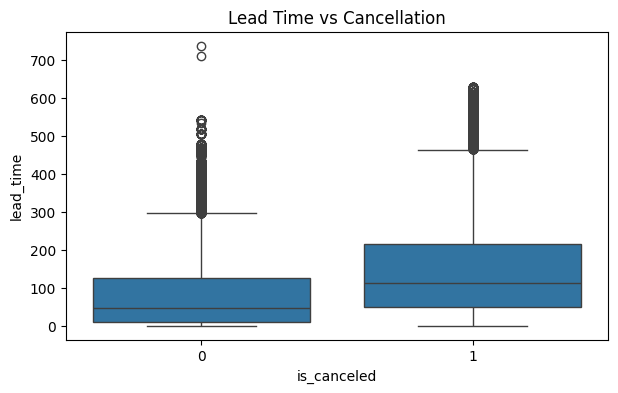

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()

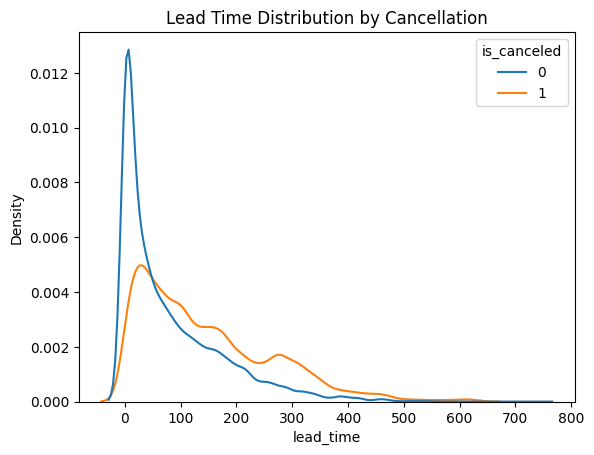

In [13]:
sns.kdeplot(
    data=df, x='lead_time',
    hue='is_canceled', common_norm=False
)
plt.title("Lead Time Distribution by Cancellation")
plt.show()

In [14]:
corr = df[numeric_cols].corr()["is_canceled"].sort_values(ascending=False)
print(corr)

is_canceled                       1.000000
lead_time_log                     0.320063
risky_customer                    0.293571
lead_time                         0.293123
has_previous_cancel               0.270943
adr_x_lead_time                   0.220351
previous_cancellations            0.110133
is_extreme_lead                   0.104346
was_waitlisted                    0.099032
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
total_guests                      0.046540
high_adr                          0.038751
adr_per_person                    0.034540
stays_in_week_nights              0.024765
total_nights                      0.017779
children                          0.005069
arrival_date_week_number          0.000500
stays_in_weekend_nights          -0.001791
is_high_season                   -0.002776
has_children                     -0.003666
arrival_date_day_of_month        -0.003858
weekend_rat

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Categorical columns:", cat_cols)

for col in cat_cols:
    print(f"\n==================== {col} ====================")
    grouped = df.groupby(col)["is_canceled"].mean().sort_values()
    print(grouped)

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'city']

==================== hotel ====================
hotel
Resort Hotel - Delhi         0.262656
Resort Hotel - Chandigarh    0.268156
Resort Hotel - Goa           0.268311
Resort Hotel - Bhopal        0.270734
Resort Hotel - Ahmedabad     0.274114
Resort Hotel - Lucknow       0.275688
Resort Hotel - Mumbai        0.277903
Resort Hotel - Chennai       0.278235
Resort Hotel - Jaipur        0.278293
Resort Hotel - Kolkata       0.278347
Resort Hotel - Pune          0.281616
Resort Hotel - Bangalore     0.282471
Resort Hotel - Indore        0.283026
Resort Hotel - Kochi         0.286449
Resort Hotel - Hyderabad     0.299016
City Hotel - Bhopal          0.406372
City Hotel - Kochi           0.409214
City Hotel - Jaipur          0.412128
City Hotel - Delhi           0.412795
City Hotel - Chennai    

In [16]:
df["is_canceled"].skew()

np.float64(0.5366783893964284)

In [17]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_ratio = (df.isnull().mean()*100).sort_values(ascending=False)

print("\n=== Missing Values (Count) ===")
print(missing)

print("\n=== Missing Values (Ratio %) ===")
print(missing_ratio)


=== Missing Values (Count) ===
hotel                             0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests       

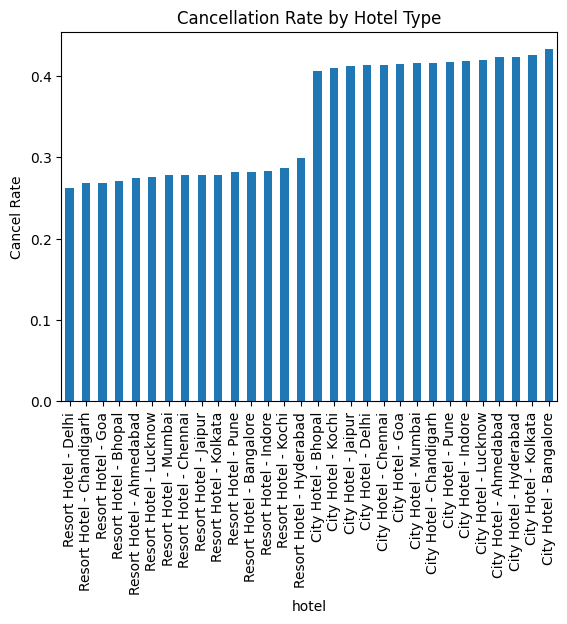

In [18]:
df.groupby('hotel')['is_canceled'].mean().sort_values().plot(kind='bar')
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancel Rate")
plt.show()

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'lead_time_log', 'is_extreme_lead', 'total_guests', 'is_free_booking', 'has_previous_cancel', 'is_loyal_customer', 'room_changed', 'has_agent', 'is_short_stay', 'is_long_stay', 'weekend_ratio', 'is_last_minute', 'adr_x_lead_time', 'high_adr', 'adr_per_person', 'is_suspicious_price', 'has_children', 'has_babies', 'solo_traveler', 'many_booking_changes', 'was_waitlisted', 'many_special_requests', 'needs_parking', 'is_high_season', 'online_booking', 'agent_booking', 'risky_customer', 'room_mismatch_online', 'is_canceled']
Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment'

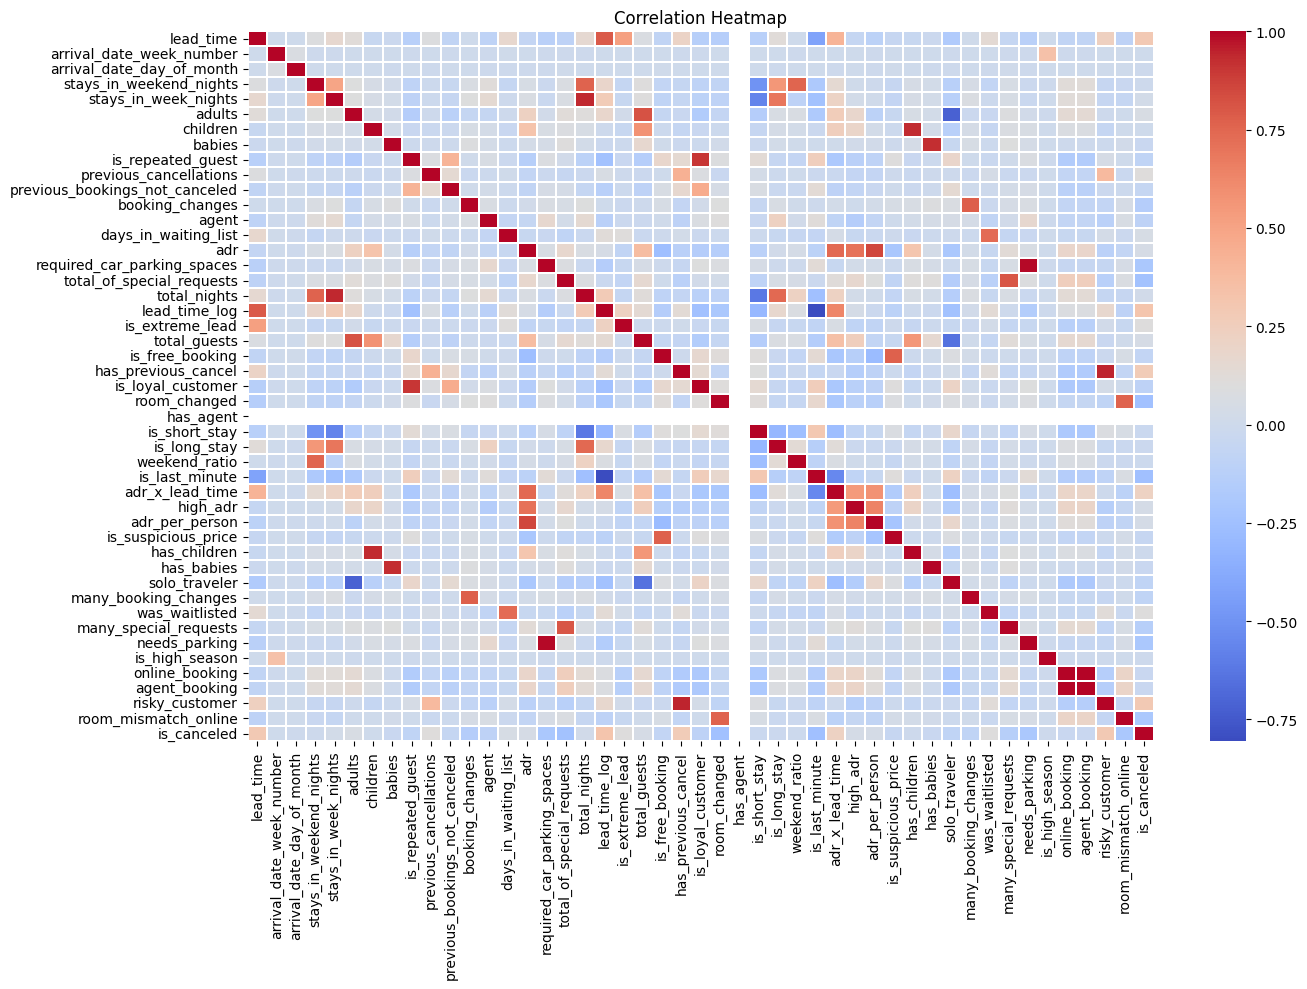

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap='coolwarm',
    linewidths=0.3
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("visuals/correlation_heatmap.png")
plt.show()

In [21]:
print(df[numeric_cols].skew().sort_values(ascending=False))

babies                            24.646545
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
adults                            18.317805
days_in_waiting_list              11.944353
adr_per_person                    11.692955
has_babies                        11.278618
adr                               10.530214
total_guests                      10.153942
is_suspicious_price                9.922111
is_free_booking                    7.613311
booking_changes                    6.000270
is_extreme_lead                    5.912159
was_waitlisted                     5.414584
is_repeated_guest                  5.326315
is_loyal_customer                  4.800015
many_booking_changes               4.388590
adr_x_lead_time                    4.317964
risky_customer                     4.183999
required_car_parking_spaces        4.163233
children                           4.112474
has_previous_cancel                3.933298
needs_parking                   

In [22]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).sum(axis=0)

print("Outlier count by column:")
print(outliers)

Outlier count by column:
[1454    0    0 2199 1669  481 3729  917 3810  317  936 1570  824 1871
 1138 7416 2877 1720    0 3148  154 1959 6484 4592    0    0    0    0
    0    0  982    0 1060 1177 8592  917    0 5375 3698    0 7416    0
    0    0 5837 9131    0]


C:\Users\user\AppData\Local\Temp\ipykernel_3780\3668943164.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(stats.zscore(df[numeric_cols]))


In [23]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 63


In [24]:
cat_cols = df.select_dtypes(include=['object']).columns

print("\n=== CATEGORICAL SUMMARY ===")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print("Unique:", df[col].nunique())
    print(df[col].value_counts().head())


=== CATEGORICAL SUMMARY ===

--- hotel ---
Unique: 30
hotel
City Hotel - Ahmedabad    5405
City Hotel - Bhopal       5367
City Hotel - Pune         5343
City Hotel - Jaipur       5343
City Hotel - Hyderabad    5339
Name: count, dtype: int64

--- arrival_date_month ---
Unique: 12
arrival_date_month
October    10349
July       10298
March      10216
May        10212
January    10126
Name: count, dtype: int64

--- meal ---
Unique: 5
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

--- country ---
Unique: 177
country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64

--- market_segment ---
Unique: 8
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Name: count, dtype: int64

--- distribution_channel ---
Unique: 5
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS

In [25]:
print("\n=== RARE CATEGORY DETECTION (<1%) ===")
for col in cat_cols:
    ratio = df[col].value_counts(normalize=True) * 100
    rare = ratio[ratio < 1]
    if len(rare) > 0:
        print(f"\n{col} rare values:")
        print(rare)


=== RARE CATEGORY DETECTION (<1%) ===

meal rare values:
meal
Undefined    0.979144
FB           0.668398
Name: proportion, dtype: float64

country rare values:
country
SWE    0.857693
CHN    0.836753
POL    0.769746
ISR    0.560348
RUS    0.529358
         ...   
BWA    0.000838
MDG    0.000838
CYM    0.000838
LCA    0.000838
HND    0.000838
Name: proportion, Length: 163, dtype: float64

market_segment rare values:
market_segment
Complementary    0.622330
Aviation         0.198509
Undefined        0.001675
Name: proportion, dtype: float64

distribution_channel rare values:
distribution_channel
GDS          0.161655
Undefined    0.004188
Name: proportion, dtype: float64

reserved_room_type rare values:
reserved_room_type
B    0.936427
C    0.780635
H    0.503392
P    0.010051
L    0.005026
Name: proportion, dtype: float64

assigned_room_type rare values:
assigned_room_type
H    0.596365
I    0.304046
K    0.233688
P    0.010051
L    0.000838
Name: proportion, dtype: float64

deposit_t

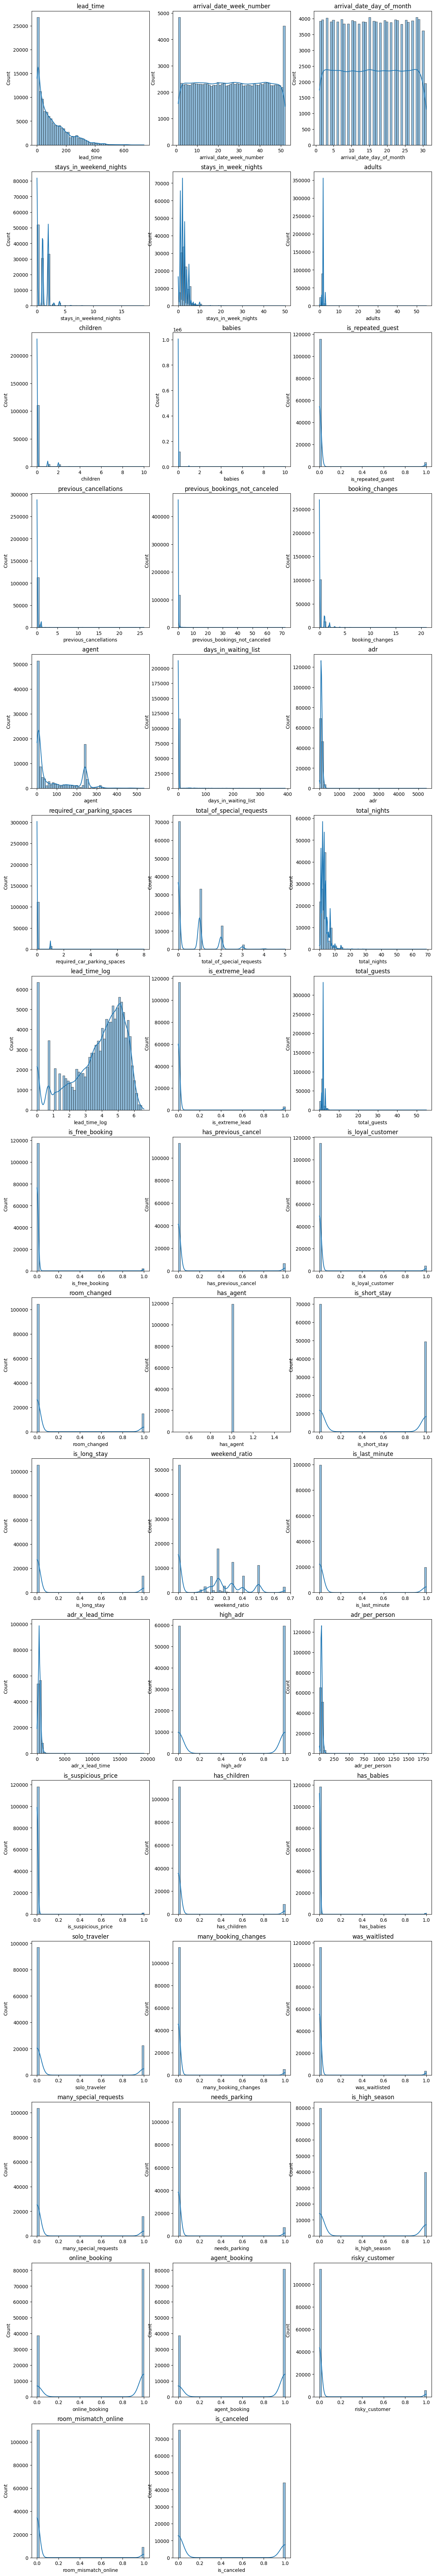

In [26]:
n = len(numeric_cols)
cols = 3
rows = int(np.ceil(n/cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*6))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), ax=axes[i], bins=50, kde=True)
    axes[i].set_title(col)
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.savefig('visuals/Numeric_Histograms_Grid.png')

In [27]:
import plotly.express as px

fig1 = px.scatter(
    df.sample(4000),
    x="lead_time",
    y="adr",
    color="is_canceled",
    size="total_guests",
    hover_data=["hotel", "city", "deposit_type"],
    title="Lead Time vs ADR (Cancellation Risk)"
)
fig1.show()

In [28]:
deposit_df = (
    df.groupby("deposit_type")["is_canceled"]
    .mean()
    .reset_index()
    .sort_values("is_canceled")
)

fig2 = px.bar(
    deposit_df,
    x="deposit_type",
    y="is_canceled",
    color="is_canceled",
    title="Cancellation Rate by Deposit Type"
)
fig2.show()

In [29]:
fig3 = px.box(
    df,
    x="hotel",
    y="lead_time",
    color="is_canceled",
    facet_col="online_booking",
    title="Lead Time Distribution by Hotel & Online Booking"
)
fig3.show()

In [30]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

month_df = (
    df.groupby("arrival_date_month")["is_canceled"]
    .mean()
    .reindex(month_order)
    .reset_index()
)

fig5 = px.line(
    month_df,
    x="arrival_date_month",
    y="is_canceled",
    markers=True,
    title="Cancellation Rate by Month"
)
fig5.show()